In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format # printing format

In [2]:
import numpy as np
np.random.seed(12345) 
np.set_printoptions(precision=4, suppress=True) # printing format

In [3]:
# to give an idea of the performance difference
# consider a Numpy array of 1 million integers, and the equivalent Python list
my_arr = np.arange(1000000)
my_list = list(range(1000000))

# now let's multiply each sequence by 2
print('Numpy array: ')
%time for _ in range(10): my_arr2 = my_arr * 2
print('----------------------------------------------------')
print('Python list: ')
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Numpy array: 
CPU times: total: 15.6 ms
Wall time: 20 ms
----------------------------------------------------
Python list: 
CPU times: total: 891 ms
Wall time: 898 ms


# 4.1 The Numpy ndarray: A Multidimensional ArrayObject

In [4]:
# one of the key features of Numpy is its N-dimensional array object, or ndarray
# which is a fast, flexible container for large datasets in Python
# arrays enable you to perform mathematical operations on whole blocks of data
# using similar syntax to the equivalent operations between scalar elements

print('generate some random data: ')
data = np.random.randn(2, 3)
print(data)
print('--------------------------------------------')
print('write mathematical operations with data')
print('multiply with a scalar')
print(data * 10)
print('-------------------')
print('add another array')
print(data + data)
print('--------------------------------------------')

generate some random data: 
[[-0.2047  0.4789 -0.5194]
 [-0.5557  1.9658  1.3934]]
--------------------------------------------
write mathematical operations with data
multiply with a scalar
[[-2.0471  4.7894 -5.1944]
 [-5.5573 19.6578 13.9341]]
-------------------
add another array
[[-0.4094  0.9579 -1.0389]
 [-1.1115  3.9316  2.7868]]
--------------------------------------------


In [5]:
# An ndarray is a generic multidimensional container for homogeneous data
# that is, all of the elements must be the same type
# every array as a 'shape' (a tuple indicating the size of each dimension)
# and a 'dtype' (an object describing the data type of the array)
print('shape:', data.shape)
print('data type:', data.dtype)

# while it's not necessary to have a deep understanding of Numpy for many data analytical applications
# becoming proficient in array-oriented programming and thinking 
# is a key step along the way to becoming a scientific Python guru

shape: (2, 3)
data type: float64


## 4.1.1 Creating ndarrays

In [6]:
# the easiest way to create an array is to use the array() function
# this accepts any sequence-like object and produces a new Numpy array containing the passed data

data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)

arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [7]:
# nested sequences, like a list of equal-length lists, will be converted into a multidimensional array

data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)

arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [8]:
# the Numpy array data2 has two dimensions with the shape inferred from the data
# we can confirm by inspecting the 'ndim' and 'shape' attribute
print('number of dimensions:', arr2.ndim)
print('shape:', arr2.shape)

number of dimensions: 2
shape: (2, 4)


In [9]:
# unless explicitly specified, np.array() tries to infer a good data type for the array that it creates
print("arr1's data type:", arr1.dtype)
print("arr2's data type:", arr2.dtype)

arr1's data type: float64
arr2's data type: int32


In [10]:
# in addition to np.array(), there are a number of functions for creating new arrays

print('np.zeros() create an arrays of 0s')
print(np.zeros(10))
print('------------------------------------')
print('np.ones() create an arrays of 1s')
print(np.ones((3, 6)))
print('------------------------------------')
print('np.empty() create an array without initializing its value to any particular value')
print(np.empty((2, 3, 2)))
print('------------------------------------')
print('np.arange() is an array-valued version of the built-in Python range() function')
print(np.arange(15))
print('------------------------------------')

np.zeros() create an arrays of 0s
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
------------------------------------
np.ones() create an arrays of 1s
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
------------------------------------
np.empty() create an array without initializing its value to any particular value
[[[1.1721e-311 2.4703e-322]
  [0.0000e+000 0.0000e+000]
  [1.1126e-306 2.4234e-057]]

 [[5.0316e-091 3.7997e+175]
  [1.2916e+160 5.1586e-066]
  [3.9991e+252 5.1956e+170]]]
------------------------------------
np.arange() is an array-valued version of the built-in Python range() function
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
------------------------------------


## 4.1.2 Data Types for ndarrays

In [11]:
# the data type or 'dtype' is a special object containing the information (metadata)
# the ndarray needs to interpret a chunk of memory as a particular type of data
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print("arr1's data type:", arr1.dtype)
print("arr2's data type:", arr2.dtype)

arr1's data type: float64
arr2's data type: int32


In [12]:
# you can explicitly convert or cast an array from one dtype to another using astype()
arr = np.array([1, 2, 3, 4, 5])
print("arr's data type:", arr.dtype)
float_arr = arr.astype(np.float64)
print("float_arr's data type:", float_arr.dtype)

arr's data type: int32
float_arr's data type: float64


In [13]:
# if floating-point numbers are casted to be of integer dtype, the decimal part will be truncated
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print("arr:", arr)
print("truncated arr:", arr.astype(np.int32))

arr: [ 3.7 -1.2 -2.6  0.5 12.9 10.1]
truncated arr: [ 3 -1 -2  0 12 10]


In [14]:
# if you have an array of strings representing numbers, you can use astype() to convert them to numeric form
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float) # Numpy aliases the Python types to its own equivalent data dtypes

array([ 1.25, -9.6 , 42.  ])

In [15]:
# you can also use another array's dtype attribute
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [16]:
# there are shorthand type code strings you can also use to refer to a dtype
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

## 4.1.3 Arithmetic with Numpy Arrays

In [17]:
# arrays are important because they enable you to express batch operations on data without writing any for loops
# Numpy users call this 'vectorization'

arr = np.array([[1., 2., 3.], [4., 5., 6.]])

# any arithmetic operations between equal-size arrays applies the operation 'element-wise'
print('array:')
print(arr)
print('------------------------------------')
print('multiply:')
print(arr * arr)
print('------------------------------------')
print('subtract:')
print(arr - arr)
print('------------------------------------')

array:
[[1. 2. 3.]
 [4. 5. 6.]]
------------------------------------
multiply:
[[ 1.  4.  9.]
 [16. 25. 36.]]
------------------------------------
subtract:
[[0. 0. 0.]
 [0. 0. 0.]]
------------------------------------


In [18]:
# arithemtic operations with scalars propagate the scalar argument to each element in the array

print('inverse:')
print(1/arr)
print('------------------------------------')
print('square root:')
print(arr ** 0.5)
print('------------------------------------')

inverse:
[[1.     0.5    0.3333]
 [0.25   0.2    0.1667]]
------------------------------------
square root:
[[1.     1.4142 1.7321]
 [2.     2.2361 2.4495]]
------------------------------------


In [19]:
# comparison between arrays of the same size yield boolean arrays

arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
print('arr2:')
print(arr2)
print('------------------------------------')
print('arr2 > arr:')
print(arr2 > arr)
print('------------------------------------')

arr2:
[[ 0.  4.  1.]
 [ 7.  2. 12.]]
------------------------------------
arr2 > arr:
[[False  True False]
 [ True False  True]]
------------------------------------


## 4.1.4 Basic Indexing and Slicing

In [20]:
# there are many ways you want to select a subset of your data or individual elements

# one-dimensional arrays are simple; on the surface they act similarly to Python lists
arr = np.arange(10)

print('arr:', list(arr))
print('------------------------------------')
print('a[5]   =', arr[5])
print('a[5:8] =', list(arr[5:8]))
print('------------------------------------')
arr[5:8] = 12
print('arr:', list(arr))
print('------------------------------------')

arr: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
------------------------------------
a[5]   = 5
a[5:8] = [5, 6, 7]
------------------------------------
arr: [0, 1, 2, 3, 4, 12, 12, 12, 8, 9]
------------------------------------


In [21]:
# an important distinction from Python's built-in lists is that slices are views on the original array

arr_slice = arr[5:8]
print('arr_slice =', list(arr_slice))
print('------------------------------------')
arr_slice[1] = 12345
print('arr =', list(arr))
print('------------------------------------')

# [:] will select all values in an array
arr_slice[:] = 64
print('arr =', list(arr))

arr_slice = [12, 12, 12]
------------------------------------
arr = [0, 1, 2, 3, 4, 12, 12345, 12, 8, 9]
------------------------------------
arr = [0, 1, 2, 3, 4, 64, 64, 64, 8, 9]


In [22]:
# with higher dimensional arrays, you have more options

arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('arr2d[2] =', arr2d[2])
print('------------------------------------')
print('arr2d[0][2] =', arr2d[0][2])
print('------------------------------------')
print('arr2d[0, 2] =', arr2d[0, 2]) # you can pass a comma-separated list of indices to select individual elements
print('------------------------------------')

arr2d[2] = [7 8 9]
------------------------------------
arr2d[0][2] = 3
------------------------------------
arr2d[0, 2] = 3
------------------------------------


In [23]:
# in multidimensional arrays, if you omit later indices, the returned object will be a lower dimensional ndarray

arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]], dtype=np.int32)
print('arr3d (2x2x3) =')
print(arr3d)
print('------------------------------------')
print('arr3d[0] is a 2x3 array:')
print(arr3d[0])
print('------------------------------------')

arr3d (2x2x3) =
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
------------------------------------
arr3d[0] is a 2x3 array:
[[1 2 3]
 [4 5 6]]
------------------------------------


In [24]:
# both scalar values and arrays can be assigned to arr3d[0]
old_values = arr3d[0].copy()
arr3d[0] = 42
print('arr3d =')
print(arr3d)
print('------------------------------------')
arr3d[0] = old_values
print('arr3d =')
print(arr3d)
print('------------------------------------')

arr3d =
[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
------------------------------------
arr3d =
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
------------------------------------


In [25]:
# similarly, arr3d[1, 0] gives you a 1-dimensional array
arr3d[1, 0]

array([7, 8, 9])

### 4.1.4.1 Indexing with slices

In [26]:
# like one-dimensional objects such as Python lists, ndarrays can be sliced with the familiar syntax

print('arr: =', list(arr))
print('------------------------------------')
print('arr[1:6] =', list(arr[1:6]))
print('------------------------------------')

arr: = [0, 1, 2, 3, 4, 64, 64, 64, 8, 9]
------------------------------------
arr[1:6] = [1, 2, 3, 4, 64]
------------------------------------


In [27]:
# consider the two-dimensional array from before, arr2d. Slicing this array is a bit different

print('arr2d =')
print(arr2d)
print('------------------------------------')
print('arr2d[:2] =')
print(arr2d[:2])
print('------------------------------------')

# you can pass multiple slices just like you can pass multiple indexes
print('arr2d[:2, 1:] =')
print(arr2d[:2, 1:])
print('------------------------------------')

# by mixing integer indexes and slices, you get lower dimensional slices
print('select the second row but only the first two columns: arr2d[1, :2]')
print(arr2d[1, :2])
print('------------------------------------')
print('select the third column but only the first two rows: arr2d[:2, 2]')
print(arr2d[:2, 2])
print('------------------------------------')

# note that a colon by itself means to take the entire axis
print('select the first column but on higher dimensional axes: arr2d[:, :1]')
print(arr2d[:, :1])
print('------------------------------------')

arr2d =
[[1 2 3]
 [4 5 6]
 [7 8 9]]
------------------------------------
arr2d[:2] =
[[1 2 3]
 [4 5 6]]
------------------------------------
arr2d[:2, 1:] =
[[2 3]
 [5 6]]
------------------------------------
select the second row but only the first two columns: arr2d[1, :2]
[4 5]
------------------------------------
select the third column but only the first two rows: arr2d[:2, 2]
[3 6]
------------------------------------
select the first column but on higher dimensional axes: arr2d[:, :1]
[[1]
 [4]
 [7]]
------------------------------------


In [28]:
# of course, assigning to a slice expression assigns to the whole section

arr2d[:2, 1] = 0
arr2d

array([[1, 0, 3],
       [4, 0, 6],
       [7, 8, 9]])

## 4.1.5 Boolean Indexing

In [29]:
# create data
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

print(names)
print('----------------------------------------------------')
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
----------------------------------------------------
[[ 0.0929  0.2817  0.769   1.2464]
 [ 1.0072 -1.2962  0.275   0.2289]
 [ 1.3529  0.8864 -2.0016 -0.3718]
 [ 1.669  -0.4386 -0.5397  0.477 ]
 [ 3.2489 -1.0212 -0.5771  0.1241]
 [ 0.3026  0.5238  0.0009  1.3438]
 [-0.7135 -0.8312 -2.3702 -1.8608]]


In [30]:
# suppose each name corresponds to a row in the data array 
# and we want to select all the rows with the corresponding name 'Bob'

print('Like arithmetic operations, comparison with arrays are also vectorized: ')
print("(names == 'Bob') =")
print(list(names == 'Bob'))
print('----------------------------------------------------')
print('This boolean array can be passed when indexing the array: ')
print("data[names == 'Bob'] =") 
print(data[names == 'Bob']) # the boolean array must be of the same length as the array it's indexing
print('----------------------------------------------------')
print('you can also select the index columns, too: ')
print("data[names == 'Bob', 2:] =")
print(data[names == 'Bob', 2:])
print('----------------------------------------------------')
print("data[names == 'Bob', 3] =")
print(data[names == 'Bob', 3])
print('----------------------------------------------------')

Like arithmetic operations, comparison with arrays are also vectorized: 
(names == 'Bob') =
[True, False, False, True, False, False, False]
----------------------------------------------------
This boolean array can be passed when indexing the array: 
data[names == 'Bob'] =
[[ 0.0929  0.2817  0.769   1.2464]
 [ 1.669  -0.4386 -0.5397  0.477 ]]
----------------------------------------------------
you can also select the index columns, too: 
data[names == 'Bob', 2:] =
[[ 0.769   1.2464]
 [-0.5397  0.477 ]]
----------------------------------------------------
data[names == 'Bob', 3] =
[1.2464 0.477 ]
----------------------------------------------------


In [31]:
# to select everything but 'Bob', use either != or negate the condition using ~

print("(names != 'Bob') =")
print(list(names != 'Bob'))
print('----------------------------------------------------')
print("data[~(names == 'Bob')] =")
print(data[~(names == 'Bob')])
print('----------------------------------------------------')

(names != 'Bob') =
[False, True, True, False, True, True, True]
----------------------------------------------------
data[~(names == 'Bob')] =
[[ 1.0072 -1.2962  0.275   0.2289]
 [ 1.3529  0.8864 -2.0016 -0.3718]
 [ 3.2489 -1.0212 -0.5771  0.1241]
 [ 0.3026  0.5238  0.0009  1.3438]
 [-0.7135 -0.8312 -2.3702 -1.8608]]
----------------------------------------------------


In [32]:
# the ~ operator can be useful when you want to invert a general condition

cond = (names == 'Bob')
print(data[~cond])

[[ 1.0072 -1.2962  0.275   0.2289]
 [ 1.3529  0.8864 -2.0016 -0.3718]
 [ 3.2489 -1.0212 -0.5771  0.1241]
 [ 0.3026  0.5238  0.0009  1.3438]
 [-0.7135 -0.8312 -2.3702 -1.8608]]


In [33]:
# to combine multiple boolean conditions, use & (and) and | (or) 
# Python keywords 'and', 'or' do not work with boolean arrays

mask = (names == 'Bob') | (names == 'Will')
print("mask =", list(mask))
print('----------------------------------------------------')
print("data[mask] =")
print(data[mask])
print('----------------------------------------------------')

mask = [True, False, True, True, True, False, False]
----------------------------------------------------
data[mask] =
[[ 0.0929  0.2817  0.769   1.2464]
 [ 1.3529  0.8864 -2.0016 -0.3718]
 [ 1.669  -0.4386 -0.5397  0.477 ]
 [ 3.2489 -1.0212 -0.5771  0.1241]]
----------------------------------------------------


In [34]:
# setting values with boolean arrays works in a common-sense way

data[data < 0] = 0
print(data)
print('----------------------------------------------------')
data[names != 'Joe'] = 7
print(data)
print('----------------------------------------------------')

[[0.0929 0.2817 0.769  1.2464]
 [1.0072 0.     0.275  0.2289]
 [1.3529 0.8864 0.     0.    ]
 [1.669  0.     0.     0.477 ]
 [3.2489 0.     0.     0.1241]
 [0.3026 0.5238 0.0009 1.3438]
 [0.     0.     0.     0.    ]]
----------------------------------------------------
[[7.     7.     7.     7.    ]
 [1.0072 0.     0.275  0.2289]
 [7.     7.     7.     7.    ]
 [7.     7.     7.     7.    ]
 [7.     7.     7.     7.    ]
 [0.3026 0.5238 0.0009 1.3438]
 [0.     0.     0.     0.    ]]
----------------------------------------------------


## 4.1.7 Fancy Indexing

In [35]:
# fancy indexing is a term adopted by Numpy to describe indexing using integer arrays

# suppose we have an 8x4 array
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i

arr 

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [36]:
# to select out a subset of the rows in a particular order, 
# you can simply pass a list or ndarray of integers specifying the desired order
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [37]:
# using negative indices selects rows from the end
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [38]:
# passing multiple index arrays selects a one-dimensional array of elements corresponding to each tuple of indices
arr = np.arange(32).reshape((8, 4))
print('arr =')
print(arr)
print('----------------------------------------------------')
print('arr[[1, 5, 7, 2], [0, 3, 1, 2]]] =')
print(arr[[1, 5, 7, 2], [0, 3, 1, 2]]) # elements (1, 0), (5, 3), (7, 1) and (2, 2) were selected
print('----------------------------------------------------')


arr =
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
----------------------------------------------------
arr[[1, 5, 7, 2], [0, 3, 1, 2]]] =
[ 4 23 29 10]
----------------------------------------------------


## 4.1.8 Transposing Arrays and Swapping Axes

In [39]:
# arrays have the transpose() method and also the 'T' attribute
arr = np.arange(15).reshape((3, 5))
print('arr =')
print(arr)
print('----------------------------------------------------')
print('arr.T =')
print(arr.T)
print('----------------------------------------------------')


arr =
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
----------------------------------------------------
arr.T =
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
----------------------------------------------------


In [40]:
# to compute the inner matrix product, use np.dot() 
arr = np.random.randn(6, 3)
print('arr =')
print(arr.round(4))
print('----------------------------------------------------')
print('np.dot(arr.T, arr) =')
print(np.dot(arr.T, arr).round(4))
print('----------------------------------------------------')

arr =
[[-0.8608  0.5601 -1.2659]
 [ 0.1198 -1.0635  0.3329]
 [-2.3594 -0.1995 -1.542 ]
 [-0.9707 -1.307   0.2863]
 [ 0.378  -0.7539  0.3313]
 [ 1.3497  0.0699  0.2467]]
----------------------------------------------------
np.dot(arr.T, arr) =
[[ 9.2291  0.9394  4.948 ]
 [ 0.9394  3.7662 -1.3622]
 [ 4.948  -1.3622  4.3437]]
----------------------------------------------------


In [41]:
# for higher dimensional arrays, tranpose() will accept a tuple of axis numbers to permute the axes

arr = np.arange(16).reshape((2, 2, 4))
print('arr =')
print(arr)
print('----------------------------------------------------')
print('arr.transpose((1, 0, 2)) =')
print(arr.transpose((1, 0, 2)))
print('----------------------------------------------------')


arr =
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
----------------------------------------------------
arr.transpose((1, 0, 2)) =
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]
----------------------------------------------------


In [42]:
# ndarray has the method swapaxes()
# which takes a pair of axis numbers and switches the indicated axes to rearange the data

print('arr =')
print(arr)
print('----------------------------------------------------')
print('arr.swapaxes(1, 2) =')
print(arr.swapaxes(1, 2)) # swapaxes() similarly returns a view on the data without making a copy
print('----------------------------------------------------')

arr =
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
----------------------------------------------------
arr.swapaxes(1, 2) =
[[[ 0  4]
  [ 1  5]
  [ 2  6]
  [ 3  7]]

 [[ 8 12]
  [ 9 13]
  [10 14]
  [11 15]]]
----------------------------------------------------


# 4.2 Universal Functions: Fast Element-Wise Array Functions

In [43]:
# a universal function, or 'ufunc'
# is a function that performs element-wise operations on data in ndarrays

# many ufuncs are simple element-wise transformations, like np.sqrt() and np.exp()
# these are referred to as 'unary' ufuncs

arr = np.arange(10)
print('arr =', list(arr))
print('----------------------------------------------------')
print('np.sqrt(arr) =')
print(list(np.sqrt(arr).round(4)))
print('----------------------------------------------------')
print('np.exp(arr) =')
print(list(np.exp(arr).round(4)))
print('----------------------------------------------------')

arr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
----------------------------------------------------
np.sqrt(arr) =
[0.0, 1.0, 1.4142, 1.7321, 2.0, 2.2361, 2.4495, 2.6458, 2.8284, 3.0]
----------------------------------------------------
np.exp(arr) =
[1.0, 2.7183, 7.3891, 20.0855, 54.5982, 148.4132, 403.4288, 1096.6332, 2980.958, 8103.0839]
----------------------------------------------------


In [44]:
# other functions, such as np.add() or np.maximum(), take two arrays and return a single array as the result
# thus are called 'binary' ufuncs

x = np.random.randn(8).round(4)
y = np.random.randn(8).round(4)

print('x =', x)
print('y =', y)
print('----------------------------------------------------')
print('np.maximum(x, y) =')
print(np.maximum(x, y))
print('----------------------------------------------------')

x = [-0.0119  1.0048  1.3272 -0.9193 -1.5491  0.0222  0.7584 -0.6605]
y = [ 0.8626 -0.01    0.05    0.6702  0.853  -0.9559 -0.0235 -2.3042]
----------------------------------------------------
np.maximum(x, y) =
[ 0.8626  1.0048  1.3272  0.6702  0.853   0.0222  0.7584 -0.6605]
----------------------------------------------------


In [45]:
# while not common, a ufunc can return multiple arrays
# np.modf() is one example, a vectorized version of the built-in Python divmod()
# it returns the fractional and integral parts of a floating-point array

arr = np.random.randn(7) * 5
arr.round(4, arr)

print('arr =', list(arr))
print('----------------------------------------------------')
remainder, whole_part = np.modf(arr)
print('remainder =', remainder)
print('----------------------------------------------------')
print('whole_part =', whole_part)
print('----------------------------------------------------')


arr = [-3.2623, -6.0915, -6.663, 5.3731, 3.6182, 3.45, 5.0077]
----------------------------------------------------
remainder = [-0.2623 -0.0915 -0.663   0.3731  0.6182  0.45    0.0077]
----------------------------------------------------
whole_part = [-3. -6. -6.  5.  3.  3.  5.]
----------------------------------------------------


In [46]:
# ufuncs accept an optional 'out' argument that allows them to operate in-place on arrays

print('arr =', list(arr))
print('----------------------------------------------------')
np.sqrt(arr, arr) # modify arr in-place
print(list(arr))
print('----------------------------------------------------')


arr = [-3.2623, -6.0915, -6.663, 5.3731, 3.6182, 3.45, 5.0077]
----------------------------------------------------
[nan, nan, nan, 2.3179948231176013, 1.9021566707293067, 1.857417562100671, 2.2377890874700412]
----------------------------------------------------


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16272\717166380.py:5: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, arr) # modify arr in-place


# 4.3 Array-Oriented Programming with Arrays

In [47]:
# using Numpy arrays enables you to express many kinds of data processing tasks 
# as concise array expressions that might otherwise require writing loops
# this practice of replacing explicit loops with array expressions is commonly referred to as 'vectorization'


# as a simple example, suppose we wish to evaluate the function sqrt(x^2 + y^2) across a regular grid of values
# the np.meshgrid() function takes two 1D arrays and produces two 2D matrices 
# corresponding to all pairs of (x, y) in the two arrays

points = np.arange(-5, 5, 0.01) # 1000 equally spaced points

xs, ys = np.meshgrid(points, points)
print('xs =')
print(xs)
print('----------------------------------------------------')
print('ys =')
print(ys)
print('----------------------------------------------------')

xs =
[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]
----------------------------------------------------
ys =
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]
----------------------------------------------------


In [48]:
# now, evaluating the function is a matter of writing the same expression you would write with two points
z = np.sqrt(xs**2 + ys**2).round(4)
z

array([[7.0711, 7.064 , 7.0569, ..., 7.0499, 7.0569, 7.064 ],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       ...,
       [7.0499, 7.0428, 7.0357, ..., 7.0286, 7.0357, 7.0428],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

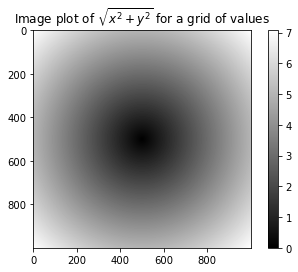

In [49]:
# as a preview of CHAPTER 9, I use matplotlib to create visualization of this 2D array

import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

## 4.3.1 Expressing Conditional Logic as Array Operations

In [50]:
# the np.where() function is a vectorized version of the tenary expression 'x if condition else y'

xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

# suppose we want to take from xarr whenever cond is True, else take from yarr
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [51]:
# suppose you have a matrix randomly generated
# and you want to replace all positive values with 2 and all negative values with -2
arr = np.random.randn(4, 4)
print('arr =')
print(arr.round(4))
print('----------------------------------------------------')
print('np.where(arr > 0, 2, -2) =')
print(np.where(arr > 0, 2, -2))
print('----------------------------------------------------')


arr =
[[-0.5031 -0.6223 -0.9212 -0.7262]
 [ 0.2229  0.0513 -1.1577  0.8167]
 [ 0.4336  1.0107  1.8249 -0.9975]
 [ 0.8506 -0.1316  0.9124  0.1882]]
----------------------------------------------------
np.where(arr > 0, 2, -2) =
[[-2 -2 -2 -2]
 [ 2  2 -2  2]
 [ 2  2  2 -2]
 [ 2 -2  2  2]]
----------------------------------------------------


## 4.3.2 Mathematical and Statistical Methods

In [52]:
# you can use aggregations (often called reductions)
# like sum(), mean(), and std() either by calling the array instance method or using the top-level Numpy function

# generate some normally distributed data
arr = np.random.randn(5, 4)

print('arr =')
print(arr.round(4))
print('----------------------------------------------------')
print('arr.mean() =', arr.mean()) # or np.mean(arr)
print('arr.sum() =', arr.sum()) # or np.sum(arr)
print('----------------------------------------------------')

# functions like mean() and sum() take an optional 'axis' argument 
# that computes the statistic over the given axis, resulting in an array with one fewer dimension
print('arr.mean(axis=1) =', list(arr.mean(axis=1).round(4)))
print('arr.sum(axis=1) =', list(arr.sum(axis=0).round(4)))
print('----------------------------------------------------')


arr =
[[ 2.1695 -0.1149  2.0037  0.0296]
 [ 0.7953  0.1181 -0.7485  0.585 ]
 [ 0.1527 -1.5657 -0.5625 -0.0327]
 [-0.929  -0.4826 -0.0363  1.0954]
 [ 0.9809 -0.5895  1.5817 -0.5287]]
----------------------------------------------------
arr.mean() = 0.19607051119998253
arr.sum() = 3.9214102239996507
----------------------------------------------------
arr.mean(axis=1) = [1.022, 0.1875, -0.502, -0.0881, 0.3611]
arr.sum(axis=1) = [3.1693, -2.6345, 2.2381, 1.1486]
----------------------------------------------------


In [53]:
# other methods like cumsum() and cumprod() do not aggregate
# instead they produce an array of the intermediate results

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [54]:
# in multidimensional arrays, accumulation functions like cumsum() return an array of the same size
# but with the partial aggregates computed along the indicated axis according to each lower dimensional slice
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print('arr =')
print(arr)
print('----------------------------------------------------')
print('arr.cumsum(axis=0) =')
print(arr.cumsum(axis=0))
print('----------------------------------------------------')
print('arr.cumprod(axis=1) =')
print(arr.cumprod(axis=1))
print('----------------------------------------------------')


arr =
[[0 1 2]
 [3 4 5]
 [6 7 8]]
----------------------------------------------------
arr.cumsum(axis=0) =
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
----------------------------------------------------
arr.cumprod(axis=1) =
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]
----------------------------------------------------


## 4.3.3 Methods for Boolean Arrays

In [55]:
# boolean values are coerced to 1 (True) and 0 (False) in the preceding methods

# thus sum() is often used as a means of counting True values in a boolean array
arr = np.random.randn(100)
print('number of positive values:', (arr > 0).sum()) 
print('----------------------------------------------------')

# there are two additional methods, any() and all()
# any() tests whether one or more values in an array is True
# all() tests if every values is True
bools = np.array([False, False, True, False])
print('bools.any() =', bools.any())
print('bools.all() =', bools.all())

# these methods also works with non-boolean arrays, where non-zero elements evaluate to True

number of positive values: 42
----------------------------------------------------
bools.any() = True
bools.all() = False


## 4.3.4 Sorting

In [56]:
# like Python's built-in type, Numpy arrays can be sorted in-place with the sort() method

arr = np.random.randn(6).round(4)
print('pre-sort: ', list(arr))
print('----------------------------------------------------')
arr.sort() 
print('post-sort', list(arr))
print('----------------------------------------------------')


pre-sort:  [0.6095, -0.4938, 1.24, -0.1357, 1.43, -0.8469]
----------------------------------------------------
post-sort [-0.8469, -0.4938, -0.1357, 0.6095, 1.24, 1.43]
----------------------------------------------------


In [57]:
# you can sort each one-dimensional section of values in a multidimensional array in-place along an axis
# by passing the axis number to sort

arr = np.random.randn(5, 3).round(4)
print('pre-sort: ')
print(arr)
print('----------------------------------------------------')
arr.sort(1)
print('post-sort: ')
print(arr)
print('----------------------------------------------------')


pre-sort: 
[[ 0.6033  1.2636 -0.2555]
 [-0.4457  0.4684 -0.9616]
 [-1.8245  0.6254  1.0229]
 [ 1.1074  0.0909 -0.3501]
 [ 0.218  -0.8948 -1.7415]]
----------------------------------------------------
post-sort: 
[[-0.2555  0.6033  1.2636]
 [-0.9616 -0.4457  0.4684]
 [-1.8245  0.6254  1.0229]
 [-0.3501  0.0909  1.1074]
 [-1.7415 -0.8948  0.218 ]]
----------------------------------------------------


In [58]:
# the top-level np.sort() returns a sorted copy of an array instead of modifying the array in-place

# a quick-and-dirty way to compute the quantiles of an array is to sort it and select the value at a particular rank
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.5311513550102103

## 4.3.5 Unique and other Set Logic

In [59]:
# Numpy has some basic set operations for one-dimensional ndarrays
# np.unique() returns the sorted unique values in an array

names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [60]:
# np.in1d() tests membership of the values in one array in another, returning a boolean array

values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

# 4.4 File Input and Output with Arrays

In [61]:
# Numpy is able to save and load data to and from disk either in text or binary format
# np.save() and np.load() are two functions for efficiently saving and loading array data on disk
# arrays are saved by default in an uncompressed raw binary format with the file extension .npy

# save data
arr = np.arange(10)
np.save('some_array', arr) # if the file path doesn't contains .npy, the extension will be appended

# load data
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
# you save multiple arrays in an uncompressed archive using np.savez()
# passing the arrays as keyword arguments
np.savez('array_archive.npz', a=arr, b=arr)

# when loading a .npz file, you get back a dict-like object that loads the individual arrays lazily
arch = np.load('array_archive.npz')

arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [63]:
# if your data compresses well, you may wish to use np.savez_compressed() instead
np.savez_compressed('array_compressed.npz', a=arr, b=arr)

# 4.5 Linear Algebra

In [64]:
# linear algebra is an important part of any array library

x = np.array([[1, 2, 3], [4, 5,6]])
y = np.array([[6, 23], [-1, 7], [8, 9]])

print('x =')
print(x)
print('----------------------------------------------------')
print('y =')
print(y)
print('----------------------------------------------------')
print('np.dot(x, y) =')
print(x.dot(y)) # or np.dot(x, y)
print('----------------------------------------------------')

x =
[[1 2 3]
 [4 5 6]]
----------------------------------------------------
y =
[[ 6 23]
 [-1  7]
 [ 8  9]]
----------------------------------------------------
np.dot(x, y) =
[[ 28  64]
 [ 67 181]]
----------------------------------------------------


In [65]:
# the @ symbol also works as an infix operator that performs matrix multiplication
x @ y

array([[ 28,  64],
       [ 67, 181]])

In [66]:
# numpy.linalg has a standard set of matrix decompositions and things like inverse and determinant

from numpy.linalg import inv, qr

X = np.random.randn(5, 5).round(4)

mat = np.dot(X.T, X)

print('inv(mat) =')
print(inv(mat).round(4))
print('----------------------------------------------------')
print('np.dot(mat, inv(mat) =')
print(np.dot(mat, inv(mat)).round(3))
print('----------------------------------------------------')
q, r = qr(mat)
print('r =')
print(r.round(3))
print('----------------------------------------------------')

inv(mat) =
[[  943.0742   881.2287 -1433.0098 -1475.9954  1801.1175]
 [  881.2287   824.2731 -1340.4645 -1380.6538  1684.8607]
 [-1433.0098 -1340.4645  2182.0143  2246.0177 -2740.8885]
 [-1475.9954 -1380.6538  2246.0177  2313.4871 -2823.1519]
 [ 1801.1175  1684.8607 -2740.8885 -2823.1519  3445.6927]]
----------------------------------------------------
np.dot(mat, inv(mat) =
[[ 1.  0. -0.  0. -0.]
 [ 0.  1.  0. -0.  0.]
 [-0. -0.  1.  0. -0.]
 [ 0.  0. -0.  1.  0.]
 [ 0.  0. -0. -0.  1.]]
----------------------------------------------------
r =
[[-1.692  4.38   0.176  0.408 -0.784]
 [ 0.    -2.643  0.194 -3.072 -1.07 ]
 [ 0.     0.    -0.814  1.541  0.616]
 [ 0.     0.     0.    -2.645 -2.167]
 [ 0.     0.     0.     0.     0.   ]]
----------------------------------------------------


# 4.6 Pseudorandom Number Generation

In [67]:
# the numpy.random module supplements the built-in Python random with 
# functions for efficiently generating whole arrays of sample values from many kinds of probability distributions

# example, get a 4x4 array of samples from the standard normal distribution using normal()
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.5732,  0.1933,  0.4429,  1.2796],
       [ 0.575 ,  0.4339, -0.7658, -1.237 ],
       [-0.5367,  1.8545, -0.92  , -0.1082],
       [ 0.1525,  0.9435, -1.0953, -0.144 ]])

In [68]:
# Python's built-in random module, only samples one value at a time
# which makes it slower than numpy.random

from random import normalvariate

N = 1000000

%timeit [normalvariate(0, 1) for _ in range(N)]

%timeit np.random.normal(size=N)

1.36 s ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
30.3 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
# you can change Numpy's number generation seed using np.random.seed()
np.random.seed(1234)

# the data generation numpy.random use a global random seed
# to avoid global state, you can use np.random.RandomState() to create a random number generator isolated from others
rng = np.random.RandomState(12345)
rng.random(10)

array([0.9296, 0.3164, 0.1839, 0.2046, 0.5677, 0.5955, 0.9645, 0.6532,
       0.7489, 0.6536])

# 4.7 Example: Random Walks

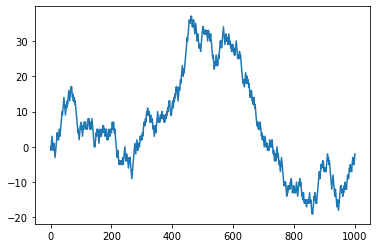

In [70]:
# the simulation of random walks provides an illustrative application of utilizing array operations
# let's first consider a simple random walk starting at 0 with steps of 1 and -1 occuring with equal probability

# the pure Python way
import random

position = 0
walk = [position]
steps = 1000 
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

plt.plot(walk)

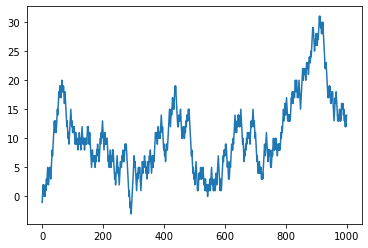

In [71]:
# you might make the observation that walk is simply the cumulative sum of the random steps
# and could be evaluated as an array expression

# the Numpy way
np.random.seed(12345)

nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

plt.plot(walk)

In [72]:
# from this we can begin to extract statistics like the minimum and maximum value along the walk's trajectory
print('walk.min() =', walk.min())
print('walk.max() =', walk.max())

walk.min() = -3
walk.max() = 31


In [73]:
# a more complicated statistics is the first crossing time
# the step at which the random walk reaches a particular value
# here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction

(np.abs(walk) >= 10).argmax() # argmax() returns the first index of the maximum value in the array

37

## 4.7.1 Simulating Many Random Walk at Once

In [74]:
# if you want to simulate many random walks (5000 in this example)
# you can generate all of the random walks with minor modifications to the preceding code
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

In [75]:
# now we can compute the maximum and minimum values obtained over all the random walks
print('walks.min() =', walks.min())
print('walks.max() =', walks.max())

walks.min() = -133
walks.max() = 138


In [76]:
# out of these walks, let's compute the minimum crossing time to 30 or -30
# this is slightly tricky because not all 5000 of them reach 30
# we can check this using the any() method

hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True, False, ..., False,  True, False])

In [77]:
print('hits30.sum() =', hits30.sum())

crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
print('crossing_times.mean() =', crossing_times.mean())

hits30.sum() = 3410
crossing_times.mean() = 498.8897360703812


(array([   3.,   40.,  332., 1372., 2874., 3130., 1678.,  479.,   87.,
           5.]),
 array([-1.0715, -0.8624, -0.6532, -0.4441, -0.2349, -0.0258,  0.1834,
         0.3926,  0.6017,  0.8109,  1.02  ]),
 <BarContainer object of 10 artists>)

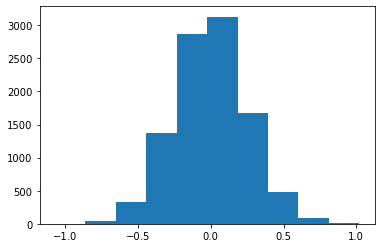

In [78]:
# feel free to experiment with other distributions for the steps other than equal-sized coin flips
# you need only use a different random number generation function
# like normal() to generate normally distributed steps with some mean (loc) and std (scale)

steps = np.random.normal(loc=0, scale=0.25, size=10000)
plt.hist(steps)